<a href="https://colab.research.google.com/github/ShounakDas101/AIML_Hari/blob/main/Another_copy_of_FMO_Complex_Simulation(Sparse).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FMO complex simulation
Description: Quantum Information Processing in FMO Complex

Author: Shounak Das

Date: Jun 2 2024

In [2]:
#Import Libraries
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path
from matplotlib.animation import FuncAnimation

# Parameters to simulate the code

In [18]:
c = 5.0  # mementun generator constant
k_x = 0.0 #(2*c-1)*np.pi  # wave constant along x-axis
k_y = (2*c-1)*np.pi  # wave constant along x-axis
m = 1.0 # mass of the particle
h_bar = 1.0 # universal constant h-cross

# classical potentials around the BChl proteins
V1=8.464*(k_x*k_x + k_y*k_y)/(2*m*h_bar) # 50% transmission and reflection probability
print("V1=",V1)
V2=2*8.464*(k_x*k_x + k_y*k_y)/(2*m*h_bar) # 50% transmission and reflection probability
V3=8.464*(k_x*k_x + k_y*k_y)/(2*m*h_bar) # 50% transmission and reflection probability
V4=8.464*(k_x*k_x + k_y*k_y)/(2*m*h_bar) # 50% transmission and reflection probability
V5=8.464*(k_x*k_x + k_y*k_y)/(2*m*h_bar) # 50% transmission and reflection probability
V6=8.464*(k_x*k_x + k_y*k_y)/(2*m*h_bar) # 50% transmission and reflection probability
V7=8.464*(k_x*k_x + k_y*k_y)/(2*m*h_bar) # 50% transmission and reflection probability

# Simulation space parameters
L = 16 # Length of cube space
Dy = 0.05 # Spatial step size. # Dy= Dz=Dx
Dt = Dy**2/4 # Temporal step size.
Nx = int(L/Dy) + 1 # Number of points on the x axis.
Ny = int(L/Dy) + 1 # Number of points on the y axis.

Nt = 400 # Number of time steps.
rx = -Dt/(2j*Dy**2) # Constant to simplify expressions.
ry = -Dt/(2j*Dy**2) # Constant to simplify expressions.
# Initial position of the center of the Gaussian wave function.
x0 = L/16
y0 = L/16

Ni = (Nx-2)*(Ny-2)  # Number of unknown factors v[i,j], i = 1,...,Nx-2, j = 1,...,Ny-2

width = 1
height = 50
angle = 150  # degrees
radius = 100


print(Nx,Ny,Ni)

V1= 3383.2214318582232
321 321 101761


# Initial Wave Function

In [ ]:
def psi_0(x,y,x_0,y_0,sigma=0.3,k_y=k_y,k_x=k_x):
    Norm1D=1/((2*np.pi*sigma*sigma)**(0.25))
    return Norm1D*np.exp(-1/2*((x-x_0)**2 + (y-y_0)**2)/sigma**2)*np.exp(1j*k_y*(y-y_0))*np.exp(1j*k_x*(x-x_0))
    #return np.exp(1j*k_x*(x-x_0)*np.exp(1j*k_y*(y-y_0)))

Comments

[[ 97.9330127  268.50063509]
 [ 97.0669873  268.00063509]
 [122.0669873  224.69936491]
 [122.9330127  225.19936491]]
[[197.9330127  268.50063509]
 [197.0669873  268.00063509]
 [222.0669873  224.69936491]
 [222.9330127  225.19936491]]
[[247.9330127  181.90063509]
 [247.0669873  181.40063509]
 [272.0669873  138.09936491]
 [272.9330127  138.59936491]]
[[297.9330127   95.30063509]
 [297.0669873   94.80063509]
 [322.0669873   51.49936491]
 [322.9330127   51.99936491]]
[[ 97.9330127   95.30063509]
 [ 97.0669873   94.80063509]
 [122.0669873   51.49936491]
 [122.9330127   51.99936491]]
[[ 47.9330127  181.90063509]
 [ 47.0669873  181.40063509]
 [ 72.0669873  138.09936491]
 [ 72.9330127  138.59936491]]
[[147.9330127  181.90063509]
 [147.0669873  181.40063509]
 [172.0669873  138.09936491]
 [172.9330127  138.59936491]]


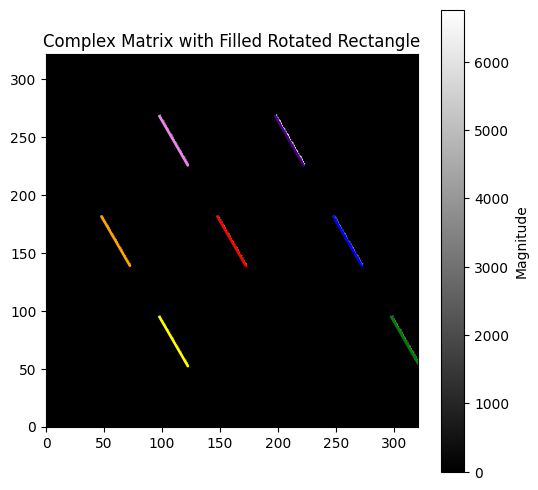

In [22]:
# Initialize a 100x100 matrix with zeros
#space = [[0 for _ in range(100)] for _ in range(100)]

# Define the matrix size and initialize with zeros
space = np.zeros((Nx, Ny), dtype=complex)

def get_rotated_rectangle(center, width, height, angle):
    # Convert angle to radians
    angle_rad = np.deg2rad(angle)

    # Define the half-dimensions
    half_width = width / 2
    half_height = height / 2

    # Define the unrotated corners relative to the center
    corners = np.array([
        [-half_width, -half_height],
        [half_width, -half_height],
        [half_width, half_height],
        [-half_width, half_height]
    ])

    # Define the rotation matrix
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])

    # Rotate and translate corners
    rotated_corners = np.dot(corners, rotation_matrix) + center

    return rotated_corners

def points_in_polygon(polygon, grid_size):
    x, y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
    points = np.vstack((x.ravel(), y.ravel())).T
    path = Path(polygon)
    mask = path.contains_points(points)
    return mask.reshape((grid_size, grid_size))

# Define the rectangle parameters
center1 = np.array([160-0.5*radius, 160+0.866*radius])
# Get the rotated rectangle corners
rectangle_corners1 = get_rotated_rectangle(center1, width, height, angle)
print(rectangle_corners1)
# Determine which points are inside the rotated rectangle
mask1 = points_in_polygon(rectangle_corners1, Nx)
# Fill the complex matrix values inside the rectangle
space[mask1] = V1

# Define the rectangle parameters
center2 = np.array([160+0.5*radius, 160+0.866*radius])
# Get the rotated rectangle corners
rectangle_corners2 = get_rotated_rectangle(center2, width, height, angle)
print(rectangle_corners2)
# Determine which points are inside the rotated rectangle
mask2 = points_in_polygon(rectangle_corners2, Nx)
# Fill the complex matrix values inside the rectangle
space[mask2] = V2

# Define the rectangle parameters
center3 = np.array([160+radius, 160])
# Get the rotated rectangle corners
rectangle_corners3 = get_rotated_rectangle(center3, width, height, angle)
print(rectangle_corners3)
# Determine which points are inside the rotated rectangle
mask3 = points_in_polygon(rectangle_corners3, Nx)
# Fill the complex matrix values inside the rectangle
space[mask3] = V3

# Define the rectangle parameters
center4 = np.array([160+0.5*radius, 160-0.866*radius])
# Get the rotated rectangle corners
rectangle_corners4 = get_rotated_rectangle(center4, width, height, angle)
print(rectangle_corners4)
# Determine which points are inside the rotated rectangle
mask4 = points_in_polygon(rectangle_corners4, Nx)
# Fill the complex matrix values inside the rectangle
space[mask4] = V4

# Define the rectangle parameters
center5 = np.array([160-0.5*radius, 160-0.866*radius])
# Get the rotated rectangle corners
rectangle_corners5 = get_rotated_rectangle(center5, width, height, angle)
print(rectangle_corners5)
# Determine which points are inside the rotated rectangle
mask5 = points_in_polygon(rectangle_corners5, Nx)
# Fill the complex matrix values inside the rectangle
space[mask5] = V5

# Define the rectangle parameters
center6 = np.array([160-radius, 160])
# Get the rotated rectangle corners
rectangle_corners6 = get_rotated_rectangle(center6, width, height, angle)
print(rectangle_corners6)
# Determine which points are inside the rotated rectangle
mask6 = points_in_polygon(rectangle_corners6, Nx)
# Fill the complex matrix values inside the rectangle
space[mask6] = V6

# Define the rectangle parameters
center7 = np.array([160+0, 160+0])
# Get the rotated rectangle corners
rectangle_corners7 = get_rotated_rectangle(center7, width, height, angle)
print(rectangle_corners7)
# Determine which points are inside the rotated rectangle
mask7 = points_in_polygon(rectangle_corners7, Nx)
# Fill the complex matrix values inside the rectangle
space[mask7] = V7

# Plot the matrix and the rotated rectangle
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(space), extent=[0, Nx, 0, Ny], origin='lower', cmap='gray')
plt.colorbar(label='Magnitude')
polygon1 = Polygon(rectangle_corners1, closed=True, edgecolor='violet', fill='blue')
polygon2 = Polygon(rectangle_corners2, closed=True, edgecolor='indigo', fill='blue')
polygon3 = Polygon(rectangle_corners3, closed=True, edgecolor='blue', fill='blue')
polygon4 = Polygon(rectangle_corners4, closed=True, edgecolor='green', fill='blue')
polygon5 = Polygon(rectangle_corners5, closed=True, edgecolor='yellow', fill='blue')
polygon6 = Polygon(rectangle_corners6, closed=True, edgecolor='orange', fill='blue')
polygon7 = Polygon(rectangle_corners7, closed=True, edgecolor='red', fill='blue')
plt.gca().add_patch(polygon1)
plt.gca().add_patch(polygon2)
plt.gca().add_patch(polygon3)
plt.gca().add_patch(polygon4)
plt.gca().add_patch(polygon5)
plt.gca().add_patch(polygon6)
plt.gca().add_patch(polygon7)
plt.xlim(0, Nx)
plt.ylim(0, Ny)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Complex Matrix with Filled Rotated Rectangle')
plt.show()

# Comments

In [ ]:
import scipy as sp
A = np.zeros((Ni), complex)
M = np.zeros((Ni), complex)

# We fill the A and M matrices.
for k in range(Ni):

    # k = (i-1)*(Ny-2) + (j-1)
    i = 1 + k//(Ny-2)
    j = 1 + k%(Ny-2)

    # Main central diagonal.
    A[k] = 1 + 2*rx + 2*ry + 1j*Dt/2*space[i,j]
    M[k] = 1 - 2*rx - 2*ry - 1j*Dt/2*space[i,j]
diag = sp.ones([Ni])
diags1 = sp.array([-ry*diag, -rx*diag,  A*diag, -rx*diag, -ry*diag])
diags2 = sp.array([ry*diag, rx*diag, M*diag, rx*diag, ry*diag])

# Construct sparse matrices
A = sparse.spdiags(diags1, sp.array([-(Nx-2), -1, 0, 1, (Nx-2)]), Ni, Ni)
M = sparse.spdiags(diags2, sp.array([-(Nx-2), -1, 0, 1, (Nx-2)]), Ni, Ni)

print(A.shape)
print(M.shape)

A = A.tocsr()
M = M.tocsr()

(101761, 101761)
(101761, 101761)


<ipython-input-19-1298242e8859>:15: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  diag = sp.ones([Ni])
<ipython-input-19-1298242e8859>:16: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  diags1 = sp.array([-ry*diag, -rx*diag,  A*diag, -rx*diag, -ry*diag])
<ipython-input-19-1298242e8859>:17: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  diags2 = sp.array([ry*diag, rx*diag, M*diag, rx*diag, ry*diag])
<ipython-input-19-1298242e8859>:20: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  A = sparse.spdiags(diags1, sp.array([-(Nx-2), -1, 0, 1, (Nx-2)]), Ni, Ni)
<ipython-input-19-1298242e8859>:21: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  M = sparse.spdiags(diags2, sp.array([-(Nx-2), -1, 0, 1

# Comments

In [ ]:
# =============================================================================
# Second step: Solve the A·x[n+1] = M·x[n] system for each time step.
# =============================================================================

from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

Asp = csc_matrix(A)

x = np.linspace(0, L, Ny-2) # Array of spatial points.
y = np.linspace(0, L, Ny-2) # Array of spatial points.
x, y = np.meshgrid(x, y)
psis = [] # To store the wave function at each time step.

psi = psi_0(x, y, x0, y0) # We initialise the wave function with the Gaussian.
psi[0,:] = psi[-1,:] = psi[:,0] = psi[:,-1] = 0 # The wave function equals 0 at the edges of the simulation box (infinite potential well).
psis.append(np.copy(psi)) # We store the wave function of this time step.

# We solve the matrix system at each time step in order to obtain the wave function.
# for i in range(1,Nt):
#     psi_vect = psi.reshape((Ni)) # We adjust the shape of the array to generate the matrix b of independent terms.
#     b = np.matmul(M,psi_vect) # We calculate the array of independent terms.
#     psi_vect = spsolve(Asp,b) # Resolvemos el sistema para este paso temporal.
#     psi = psi_vect.reshape((Nx-2,Ny-2)) # Recuperamos la forma del array de la función de onda.
#     psis.append(np.copy(psi)) # Save the result.

for i in range(1, Nt):
    # print(type(psi))
    psi_vect = psi.reshape(Ni)
    # print(type(M),type(psi_vect),type(psi_vect[0]))
    # print(psi_vect.shape,M.shape,psi_vect[0].shape)
    psi_vect = np.array(psi_vect)
    print(psi_vect.shape)
    b = M.dot(psi_vect) # Calculate the array of independent terms
    # print("b.shape:", b.shape)  # Print shape of the result
    psi_vect = spsolve(A, b)  # Solve the system for this temporal step
    psi = psi_vect.reshape(Nx-2, Ny-2, )  # Reshape the array to the shape of the wave function
    psis.append(psi)  # Save the result
    print(i*100/Nt)


mod_psis = [abs(wavefunc) for wavefunc in psis]

# # We calculate the modulus of the wave function at each time step.
# mod_psis = [] # For storing the modulus of the wave function at each time step.
# for wavefunc in psis:
#     re = np.real(wavefunc) # Real part.
#     im = np.imag(wavefunc) # Imaginary part.
#     mod = np.sqrt(re**2 + im**2) # We calculate the modulus.
#     mod_psis.append(mod) # We save the calculated modulus.

(101761,)
0.25
(101761,)
0.5
(101761,)
0.75
(101761,)
1.0
(101761,)
1.25
(101761,)
1.5
(101761,)
1.75
(101761,)
2.0
(101761,)
2.25
(101761,)
2.5
(101761,)
2.75
(101761,)
3.0
(101761,)
3.25
(101761,)
3.5
(101761,)
3.75
(101761,)
4.0
(101761,)
4.25
(101761,)
4.5
(101761,)
4.75
(101761,)
5.0
(101761,)
5.25
(101761,)
5.5
(101761,)
5.75
(101761,)
6.0
(101761,)
6.25
(101761,)
6.5
(101761,)
6.75
(101761,)
7.0
(101761,)
7.25
(101761,)
7.5
(101761,)
7.75
(101761,)
8.0
(101761,)
8.25
(101761,)
8.5
(101761,)
8.75
(101761,)
9.0
(101761,)
9.25
(101761,)
9.5
(101761,)
9.75
(101761,)
10.0
(101761,)
10.25
(101761,)
10.5
(101761,)
10.75
(101761,)
11.0
(101761,)
11.25
(101761,)
11.5
(101761,)
11.75
(101761,)
12.0
(101761,)
12.25
(101761,)
12.5
(101761,)
12.75
(101761,)
13.0
(101761,)
13.25
(101761,)
13.5
(101761,)
13.75
(101761,)
14.0
(101761,)
14.25
(101761,)
14.5
(101761,)
14.75
(101761,)
15.0
(101761,)
15.25
(101761,)
15.5
(101761,)
15.75
(101761,)
16.0
(101761,)
16.25
(101761,)
16.5
(101761,)
16.75


# Comments

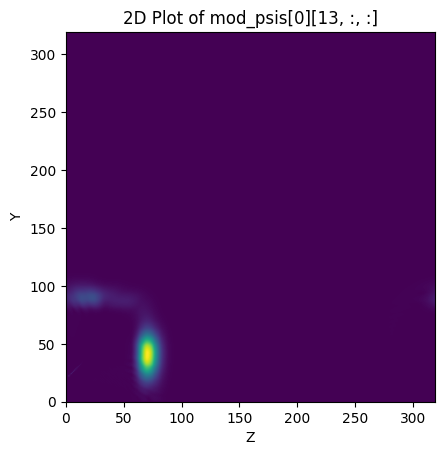

In [ ]:
# Create a 2D plot
fig, ax = plt.subplots()
ax.imshow(mod_psis[150], cmap='viridis', origin='lower', extent=(0, mod_psis[0].shape[0], 0, mod_psis[0].shape[1]))
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_title('2D Plot of mod_psis[0][13, :, :]')
plt.show()

# Comments

[[1.0, 1.0], [1.0, 1.1], [1.0, 0.9], [1.0, 1.2], [1.0, 0.8], [0.5, 1.0], [0.8, 1.0], [1.25, 1.0], [1.25, 1.5], [1.25, 1.6], [1.1, 1.0], [1.2, 1.0]]


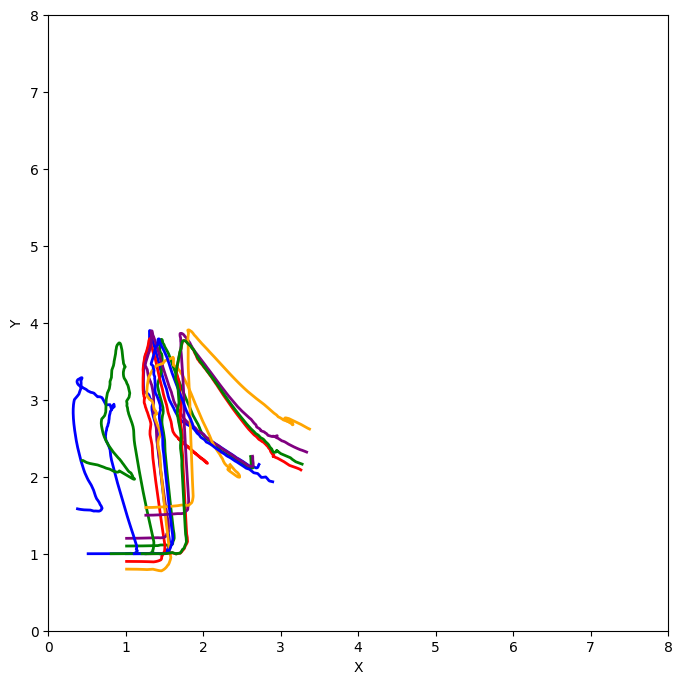

In [ ]:
# Initialize particle positions (assuming L is defined)
num_particles = 20 # Replace with the actual number of particles
#particle_position = [[L/2, L/6], [L/3, L/8], [L/6, L/2], [L/4, L/3], [L/4, 5*L/6]]
# particle_position = [[0.83, 2.8], [0.83, 3.0],[0.83, 3.2], [0.83, 3.4],[0.83, 3.6], [0.83, 3.8], [0.83, 4.0], [L/10, L/2], [0.83, 4.2], [0.83, 4.5], [0.83, 4.8], [0.83, 5.2]]
particle_position = [[y0, x0], [y0, x0+0.1], [y0, x0-0.1], [y0, x0+0.2],[y0, x0-0.2], [y0-0.5, x0], [y0-0.2, x0], [y0+0.25, x0], [y0+0.25, x0+0.5], [y0+0.25, x0+0.6], [y0+0.1, x0], [y0+0.2, x0]]
#particle_position = [[L/8,L/1.2],[L/8,L/2.5],[L/8,L/5],[L/8,L/6],[L/4,L/1.5],[L/8,L/3],[L/4,L/3.5],[L/4,L/2],[L/8,L/2],[L/2,L/4.9],[L/2,L/5.1],[L/2,L/8]]
e=1e-20 # to avoid divided by zero

# Assuming psis is defined elsewhere and contains wavefunction values
print(particle_position)
# Dictionaries to store particle positions (generalized)
particle_data = {i: {'x': [], 'y': []} for i in range(num_particles)}
# print(wavefunc.shape)
# Simulate particle movement
for wavefunc in psis:
    for k, particle in enumerate(particle_position):
        # print(wavefunc.shape)
        i = int(particle[0] / Dy)
        j = int(particle[1] / Dy)
        # print("no",i,j)

        if(i<0 or j<0):
            continue

        elif(i<=157 and j<=157):
            # Rx = (wavefunc[i, j] - wavefunc[i-1, j])/Dy
            # Ry = (wavefunc[i, j] - wavefunc[i, j-1])/Dy
            # print("yes",i,j)
        # elif(i<0 or j<0):
        #     print("yes",i,j)
            Rx = (wavefunc[i + 1, j] - wavefunc[i, j])/Dy
            Ry = (wavefunc[i, j + 1] - wavefunc[i, j])/Dy
        else:
            continue

        if(wavefunc[i,j]==0):
            continue
        Rx = Rx / (wavefunc[i, j] + e)
        Ry = Ry / (wavefunc[i, j] + e)
        # print(wavefunc[i,j])
        # if (wavefunc[i,j]==0):
        #     print(0)

        Rx = Dt * Rx.imag
        Ry = Dt * Ry.imag

        particle[0] += Rx
        particle[1] += Ry

        # if(k==14):
        #     print(k,particle[0],particle[1],Rx,Ry,wavefunc[i,j])

        # Append positions to dictionaries
        particle_data[k]['x'].append((particle[0]))
        particle_data[k]['y'].append((particle[1]))


# Plot particle movement with different colors
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Adjust colors as needed
plt.figure(figsize=(8, 8))  # Set figure size for better visualization

# Loop through particle data and plot trajectories
for i, particle in particle_data.items():
    label = f'Particle {i+1}'  # Adjust label format if needed
    plt.plot(particle['x'], particle['y'], label=label, color=colors[i % len(colors)], linewidth=2)  # Cycle through colors

plt.xlim(0, 8)
plt.ylim(0, 8)
# lines = [
#     (((center_x)*Dy, (center_y)*Dy), ((center_x+rectangle_width)*Dy, (center_y)*Dy)),
#     (((center_x+radius)*Dy, (center_y)*Dy), ((center_x+radius+rectangle_width)*Dy, (center_y)*Dy)),
#     (((center_x-radius)*Dy, (center_y)*Dy), ((center_x-radius+rectangle_width)*Dy, (center_y)*Dy)),
#     (((center_x+0.5*radius)*Dy, (center_y+0.866*radius)*Dy), ((center_x+0.5*radius+rectangle_width)*Dy, (center_y+0.866*radius)*Dy)),
#     (((center_x-0.5*radius)*Dy, (center_y-0.866*radius)*Dy), ((center_x-0.5*radius+rectangle_width)*Dy, (center_y-0.866*radius)*Dy)),
#     (((center_x+0.5*radius)*Dy, (center_y-0.866*radius)*Dy), ((center_x+0.5*radius+rectangle_width)*Dy, (center_y-0.866*radius)*Dy)),
#     (((center_x-0.5*radius)*Dy, (center_y+0.866*radius)*Dy), ((center_x-0.5*radius+rectangle_width)*Dy, (center_y+0.866*radius)*Dy))
# ]

# for line in lines:
#     x, y = zip(*line)  # Unpack coordinates from tuples
#     plt.plot(x, y, color='black', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
# plt.legend()
plt.show()

# Comments

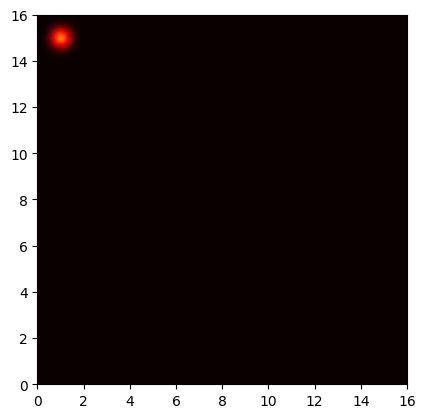

In [ ]:
# =============================================================================
# Third step: We make the animation.
# =============================================================================

fig = plt.figure() # We create the figure.
ax = fig.add_subplot(111, xlim=(0,L), ylim=(0,L)) # We add the subplot to the figure.

img = ax.imshow(mod_psis[0], extent=[0,L,0,L], cmap=plt.get_cmap("hot"), vmin=0, vmax=np.max(mod_psis), zorder=1) # Here the modulus of the 2D wave function shall be represented.

# We paint the walls of the double slit with rectangles.
slitcolor = "w" # Color of the rectangles.
slitalpha = 0.08 # Transparency of the rectangles.
#wall_bottom = Rectangle((j0*Dy,0),     w, i3*Dy,      color=slitcolor, zorder=50, alpha=slitalpha) # (x0, y0), width, height
#wall_middle = Rectangle((j0*Dy,i2*Dy), w, (i1-i2)*Dy, color=slitcolor, zorder=50, alpha=slitalpha)
#wall_top    = Rectangle((j0*Dy,i0*Dy), w, i3*Dy,      color=slitcolor, zorder=50, alpha=slitalpha)

# We add the rectangular patches to the plot.
#ax.add_patch(wall_bottom)
#ax.add_patch(wall_middle)
#ax.add_patch(wall_top)

# We define the animation function for FuncAnimation.

def animate(i):

    """
    Animation function. Paints each frame. Function for Matplotlib's
    FuncAnimation.
    """

    img.set_data(mod_psis[i]) # Fill img with the modulus data of the wave function.
    img.set_zorder(1)

    return img, # We return the result ready to use with blit=True.


anim = FuncAnimation(fig, animate, interval=1, frames =np.arange(0,Nt,2), repeat=False, blit=0) # We generate the animation.# Generamos la animación.
plt.show() # We finally show the animation.

# Comments

In [ ]:
## Save the animation (Ubuntu).
anim.save('./FMO_Complex_Simul.mp4', writer="ffmpeg", fps=60)

# Comments

In [ ]:
#print(psis[51][5])
print(len(psis))
print(len(psis[0]))
print(len(psis[0][0]))
print(psis[0][80][80].imag)
print(type(psis[0][60][80]))
print(len(mod_psis[0][0]))
print(mod_psis[0][1])
print(len(mod_psis[0]))
print(len(mod_psis))
print(mod_psis)

400
319
319
-5.197692664870658e-45
<class 'numpy.complex128'>
319
[0.00000000e+000 5.12588113e-005 8.59481943e-005 1.40116418e-004
 2.22088124e-004 3.42251759e-004 5.12802441e-004 7.47030821e-004
 1.05806171e-003 1.45702673e-003 1.95077905e-003 2.53940920e-003
 3.21396643e-003 3.95488651e-003 4.73162979e-003 5.50391263e-003
 6.22467021e-003 6.84455479e-003 7.31742205e-003 7.60597768e-003
 7.68663096e-003 7.55267953e-003 7.21522910e-003 6.70167305e-003
 6.05202048e-003 5.31375570e-003 4.53614387e-003 3.76492301e-003
 3.03815146e-003 2.38367358e-003 1.81831110e-003 1.34857044e-003
 9.72440696e-004 6.81768069e-004 4.64723068e-004 3.07989454e-004
 1.98454753e-004 1.24328646e-004 7.57294751e-005 4.48479639e-005
 2.58228729e-005 1.44560761e-005 7.86828959e-006 4.16384245e-006
 2.14235917e-006 1.07170269e-006 5.21243196e-007 2.46485014e-007
 1.13324727e-007 5.06573991e-008 2.20163406e-008 9.30318002e-009
 3.82209746e-009 1.52670852e-009 5.92917878e-010 2.23880879e-010
 8.21908560e-011 2.93368